In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns

In [2]:
raw_structure_data = pd.read_csv('csv_building_structure.csv')

In [3]:
raw_structure_data.dropna(inplace=True)
raw_structure_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 762094 entries, 0 to 762105
Data columns (total 31 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             762094 non-null  int64 
 1   district_id                             762094 non-null  int64 
 2   vdcmun_id                               762094 non-null  int64 
 3   ward_id                                 762094 non-null  int64 
 4   count_floors_pre_eq                     762094 non-null  int64 
 5   count_floors_post_eq                    762094 non-null  int64 
 6   age_building                            762094 non-null  int64 
 7   plinth_area_sq_ft                       762094 non-null  int64 
 8   height_ft_pre_eq                        762094 non-null  int64 
 9   height_ft_post_eq                       762094 non-null  int64 
 10  land_surface_condition                  762094 non-null 

In [4]:
pd.set_option('display.max_columns', 32)
display(raw_structure_data)

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
0,120101000011,12,1207,120703,1,1,9,288,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Used in risk,Grade 3,Major repair
1,120101000021,12,1207,120703,1,1,15,364,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Repaired and used,Grade 5,Reconstruction
2,120101000031,12,1207,120703,1,1,20,384,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
3,120101000041,12,1207,120703,1,1,20,312,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
4,120101000051,12,1207,120703,1,1,30,308,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 1,Minor repair
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762101,366709001241,36,3603,360302,2,0,60,165,18,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Attached-2 side,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Rubble clear,Grade 5,Reconstruction
762102,366709001251,36,3603,360302,2,0,35,342,18,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Attached-1 side,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Rubble clear,Grade 5,Reconstruction
762103,366709001261,36,3603,360302,2,0,35,342,18,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Rubble clear,Grade 5,Reconstruction
762104,366709001271,36,3603,360302,2,0,19,306,18,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Rubble clear,Grade 5,Reconstruction


In [5]:
distrct_map = pd.read_csv("ward_vdcmun_district_name_mapping.csv")
structure_data = pd.merge(raw_structure_data, distrct_map, on=['ward_id', 'vdcmun_id', 'district_id'], how='left')

In [6]:
structure_data = structure_data.drop(['building_id', 'district_id', 'vdcmun_id', 'ward_id', 'count_floors_post_eq', \
    'height_ft_post_eq', 'condition_post_eq', 'technical_solution_proposed', 'vdcmun_name'], axis=1)

In [8]:
numeric_variables = structure_data.select_dtypes(include=['float64', 'int64'])

##对数变换
log_transformed_data = np.log1p(numeric_variables)

structure_data[numeric_variables.columns] = log_transformed_data

In [9]:
structure_data['damage_grade'].value_counts()

Grade 5    275766
Grade 4    183844
Grade 3    136412
Grade 2     87257
Grade 1     78815
Name: damage_grade, dtype: int64

In [10]:
severity_mapping = {'Grade 1': 1, 'Grade 2': 2, 'Grade 3': 3, 'Grade 4': 4, 'Grade 5': 5}
structure_data['damage_grade'] = structure_data['damage_grade'].map(severity_mapping)

In [11]:
columns_to_encode = ['land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type',
                      'other_floor_type', 'position', 'plan_configuration']

structure_data = pd.get_dummies(structure_data, columns=columns_to_encode)

In [12]:
structure_data['district_name'].value_counts()

Kavrepalanchok    98019
Makwanpur         90994
Dhading           89122
Sindhupalchok     88741
Gorkha            78074
Nuwakot           77148
Sindhuli          68749
Dolakha           60639
Ramechhap         58612
Okhaldhunga       39352
Rasuwa            12644
Name: district_name, dtype: int64

In [13]:
grouped_dataframes = structure_data.groupby('district_name')
district_dataframes = {name: group for name, group in grouped_dataframes}

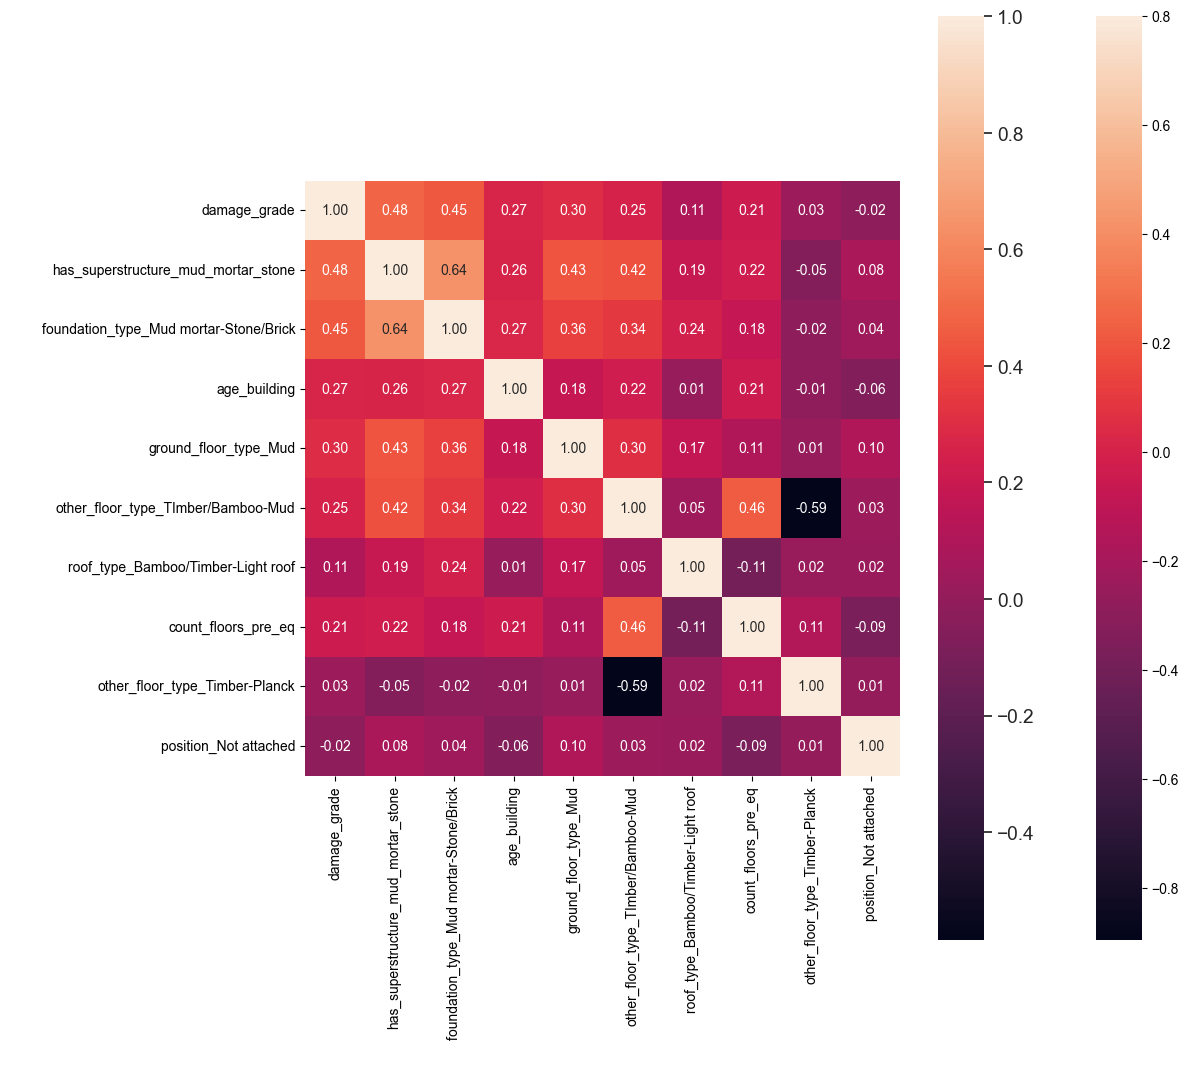

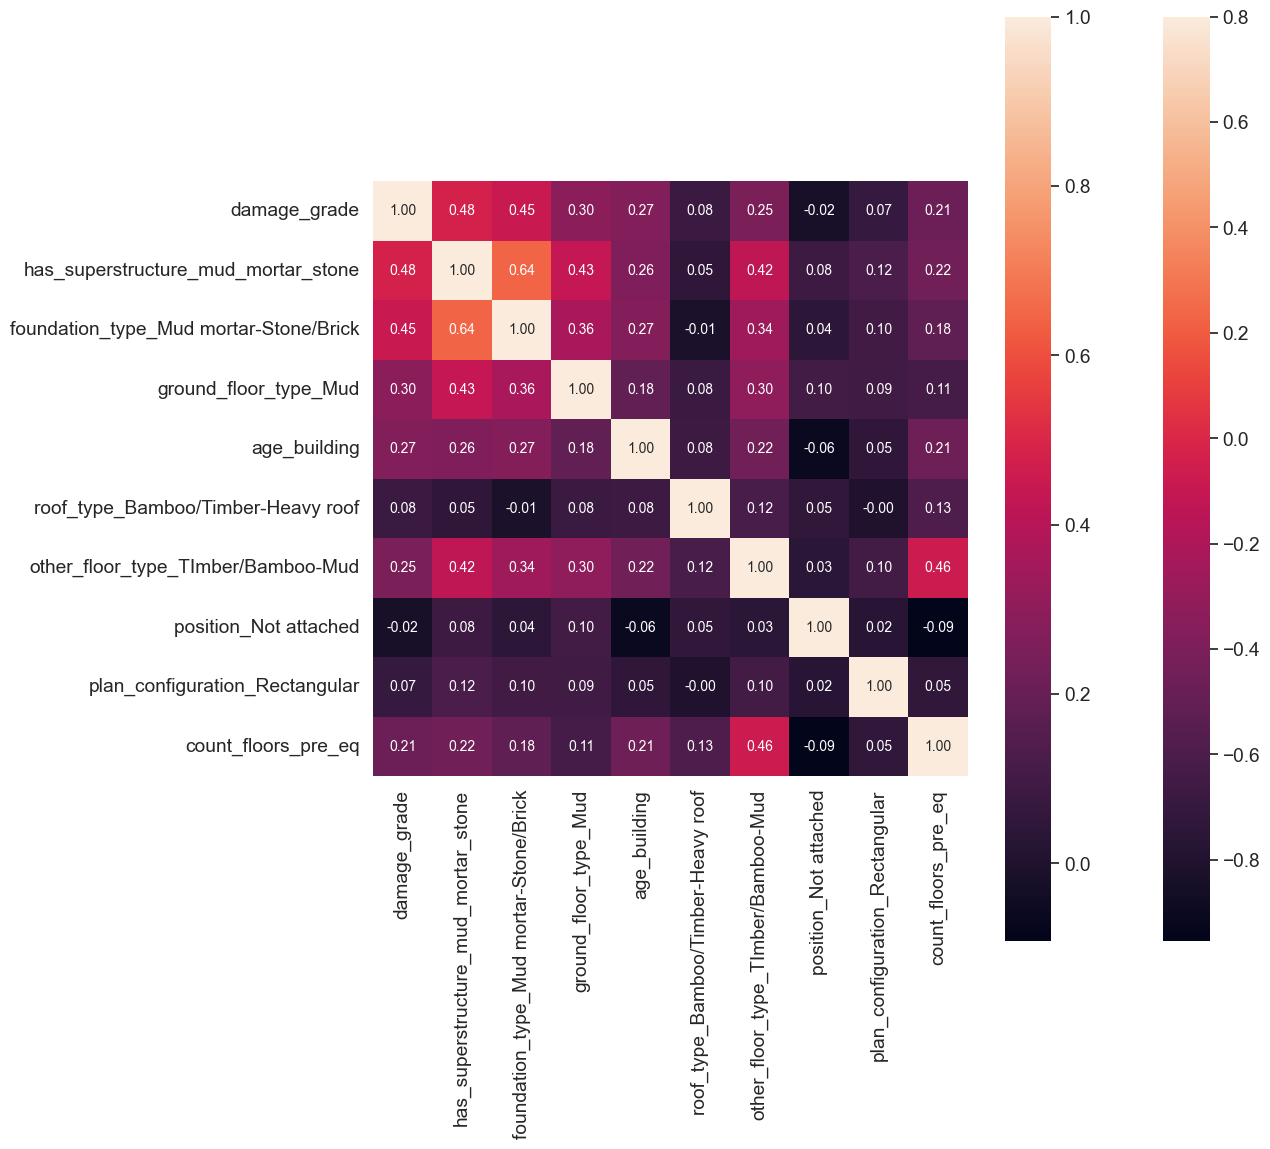

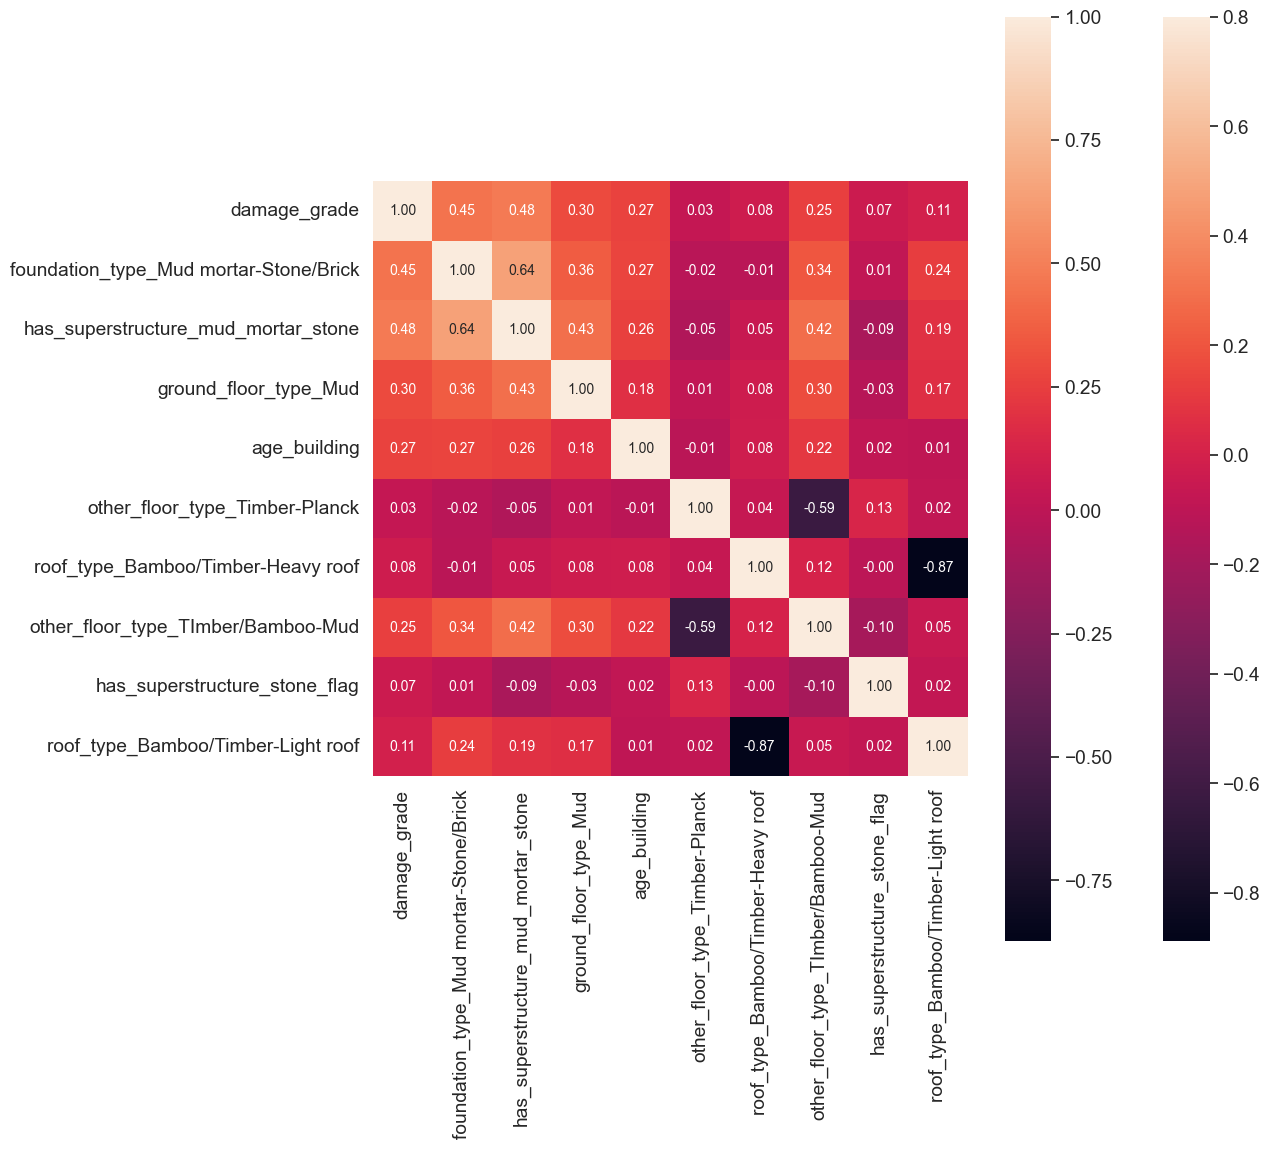

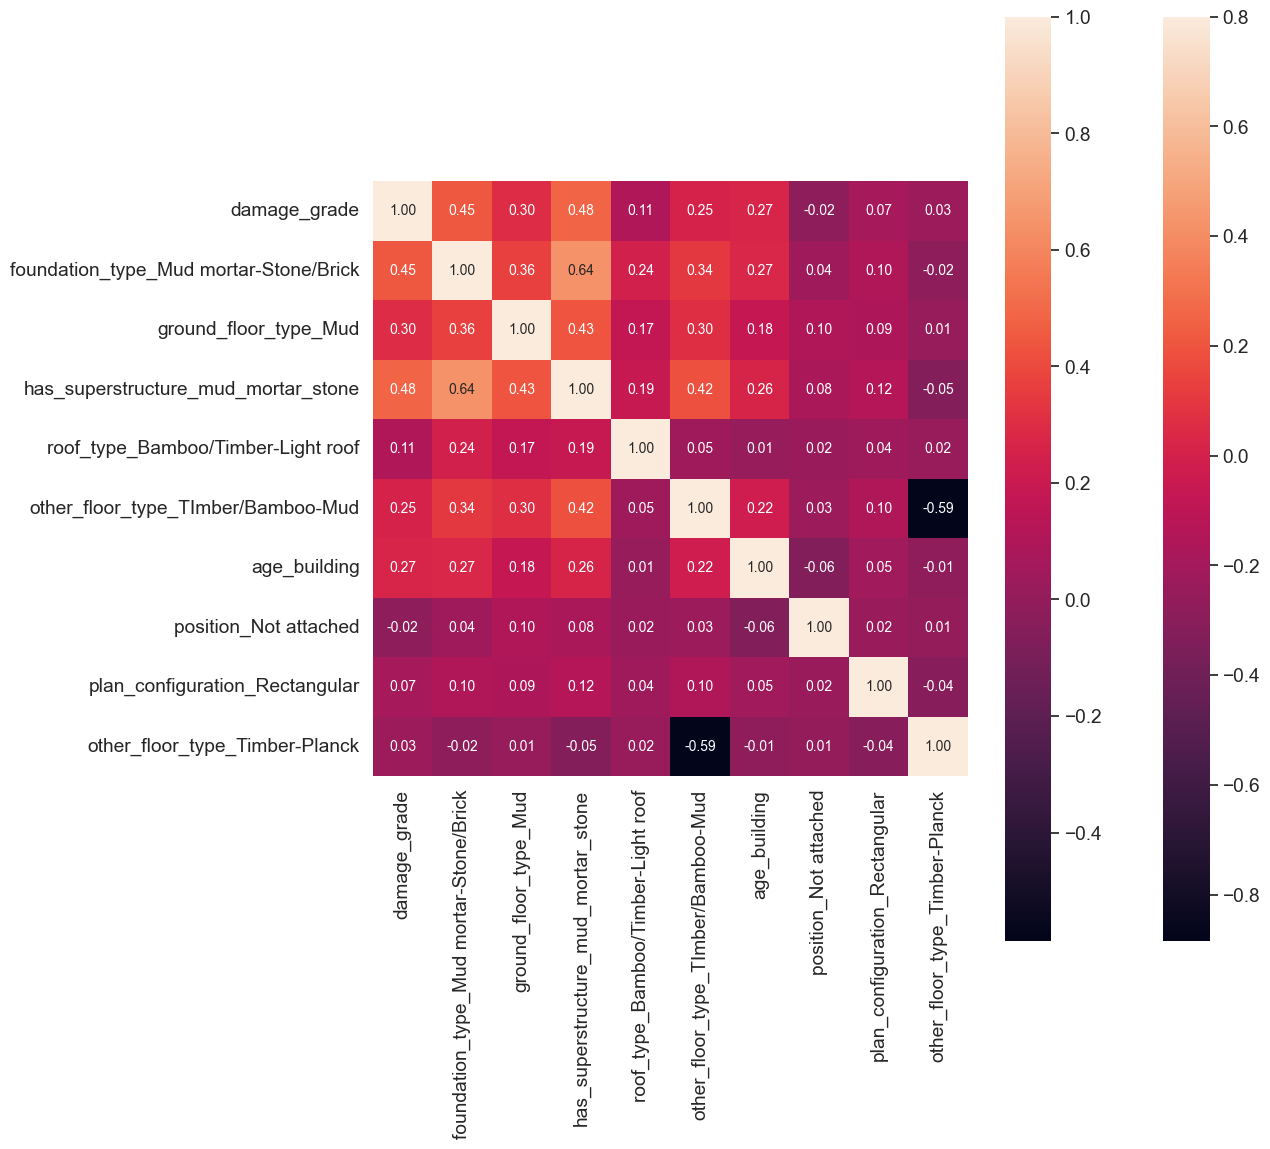

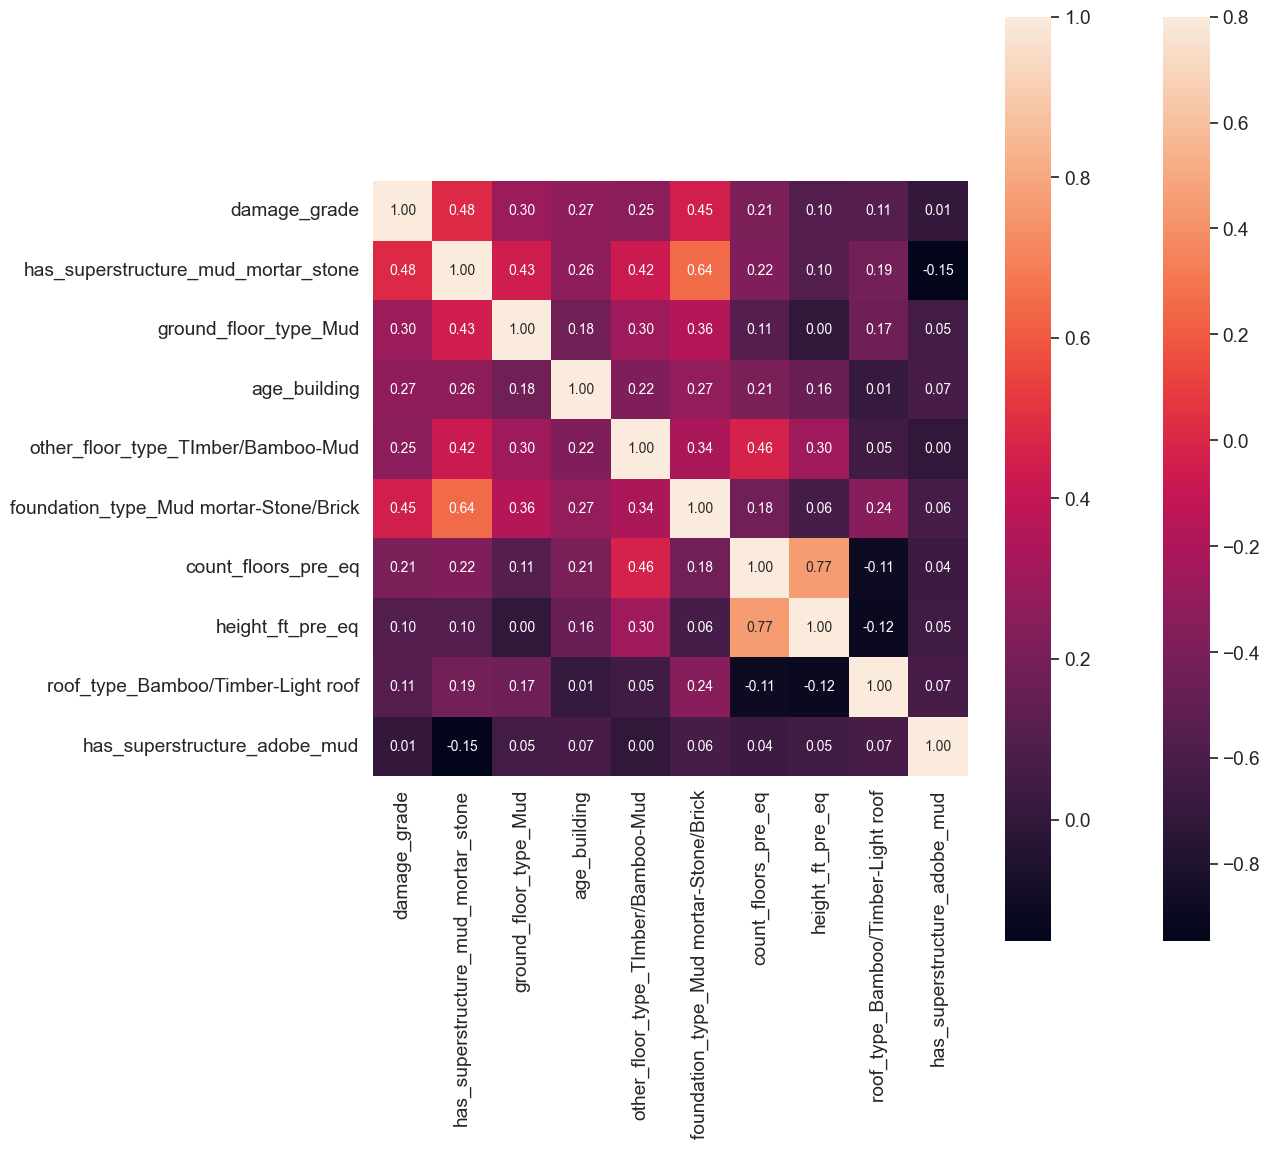

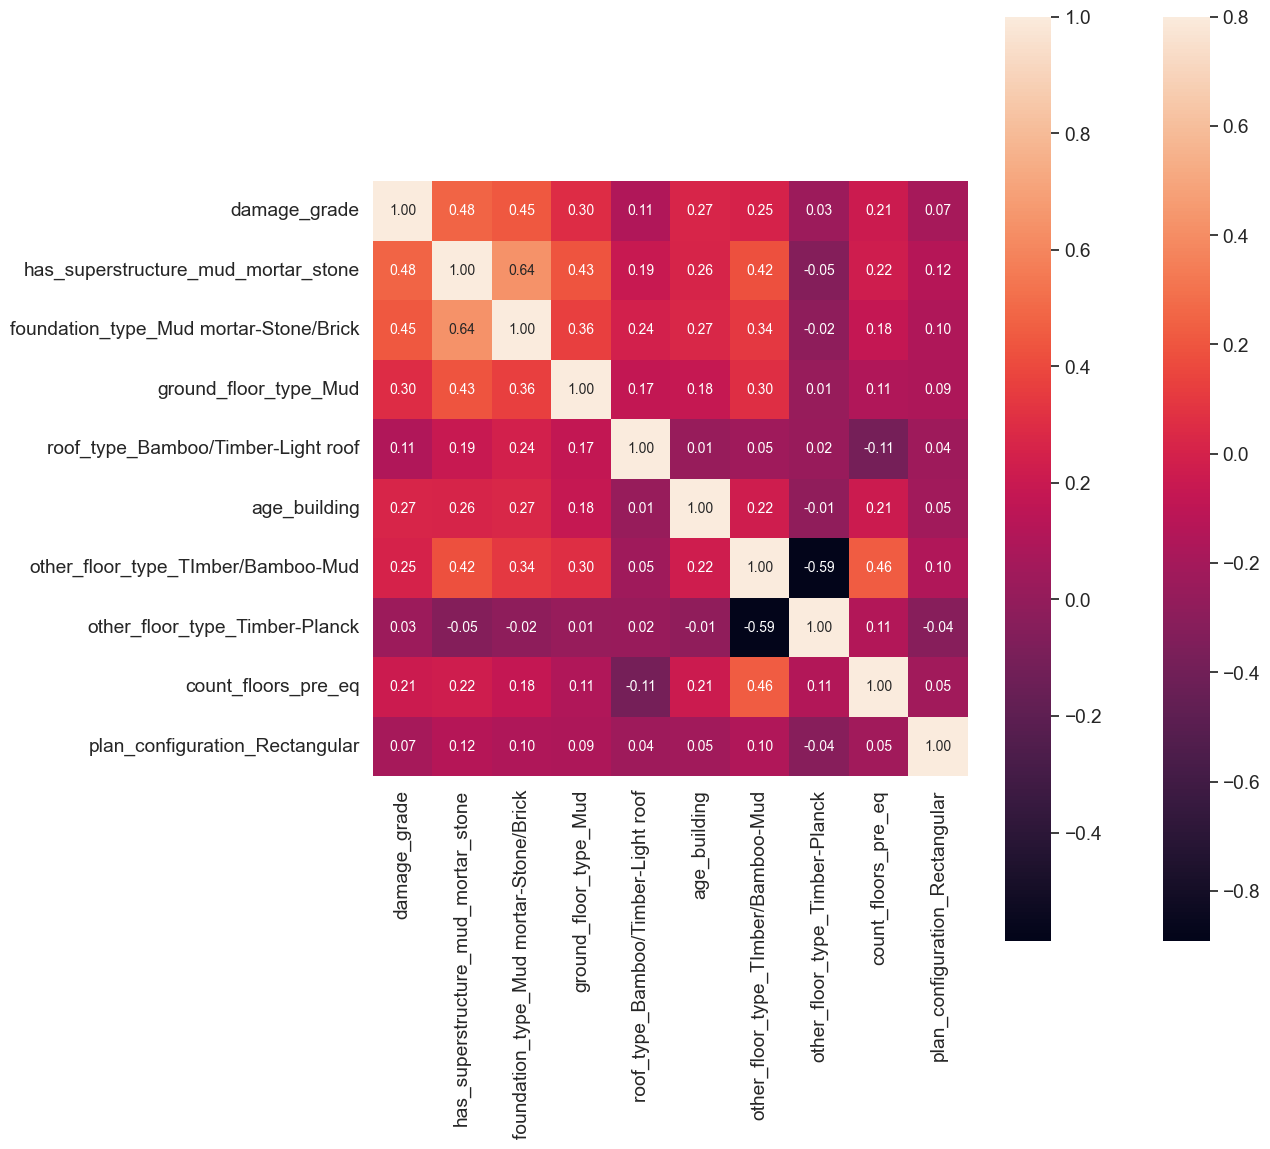

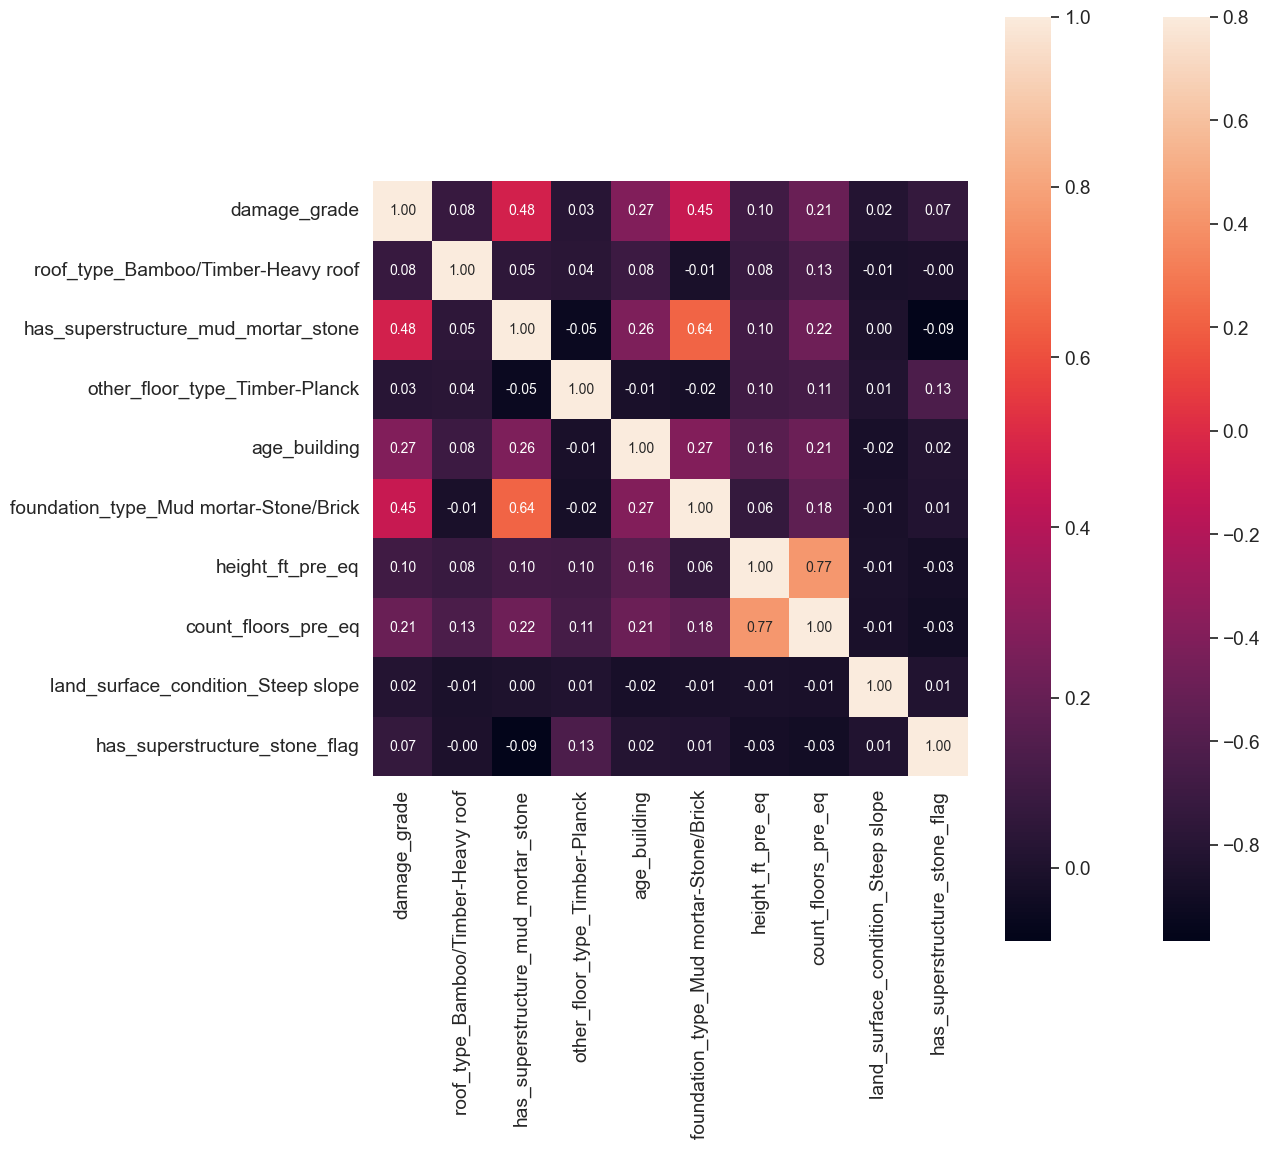

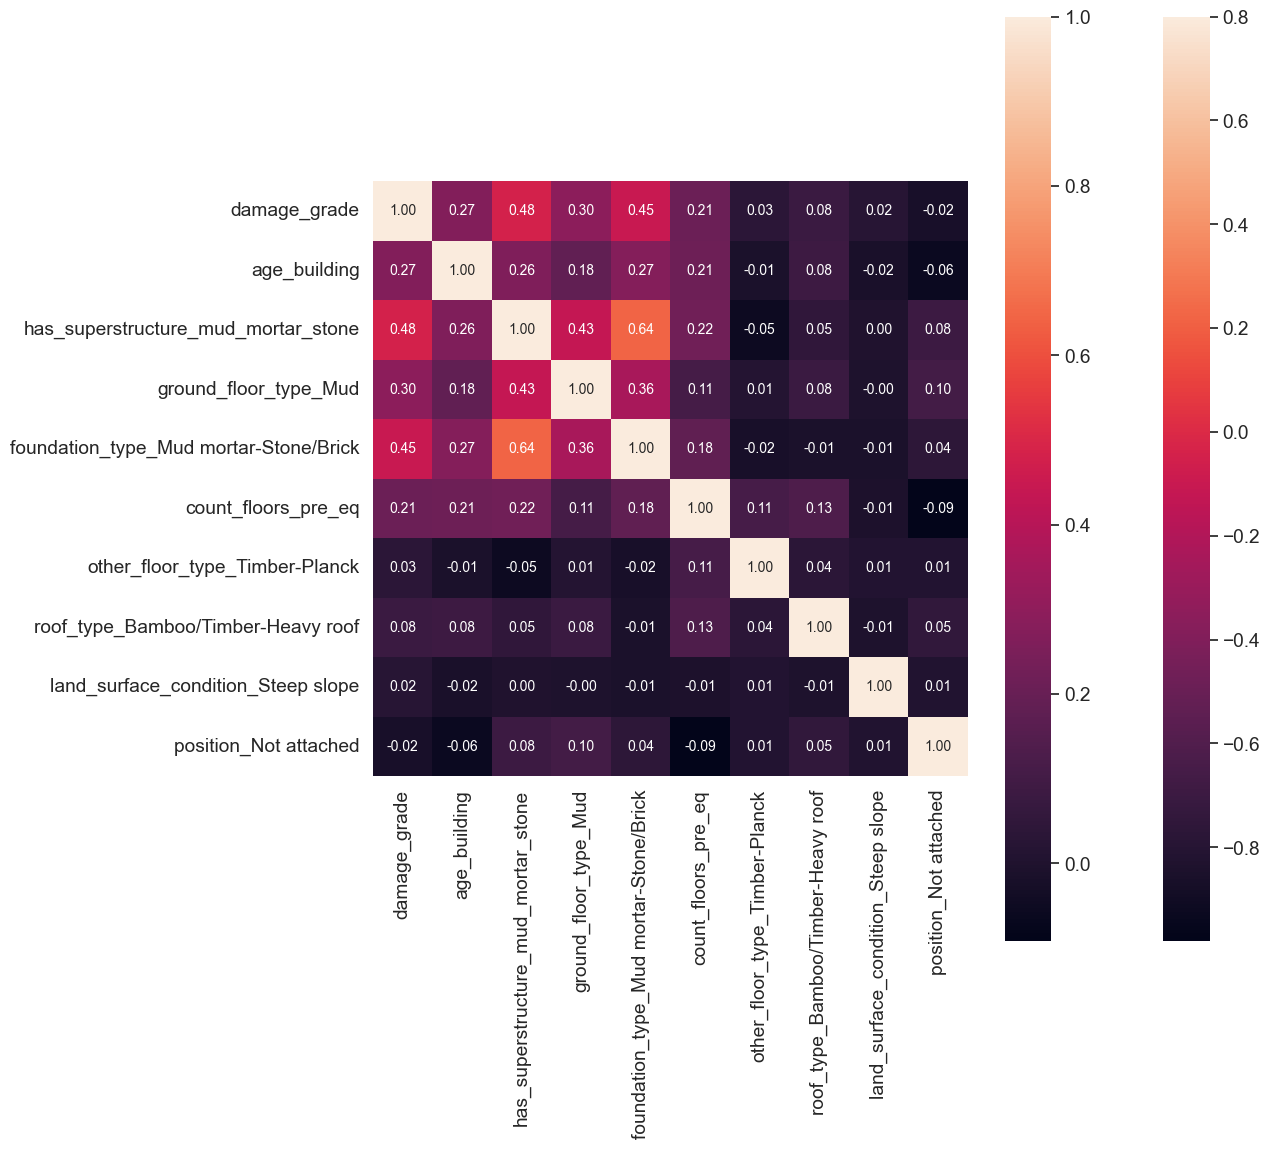

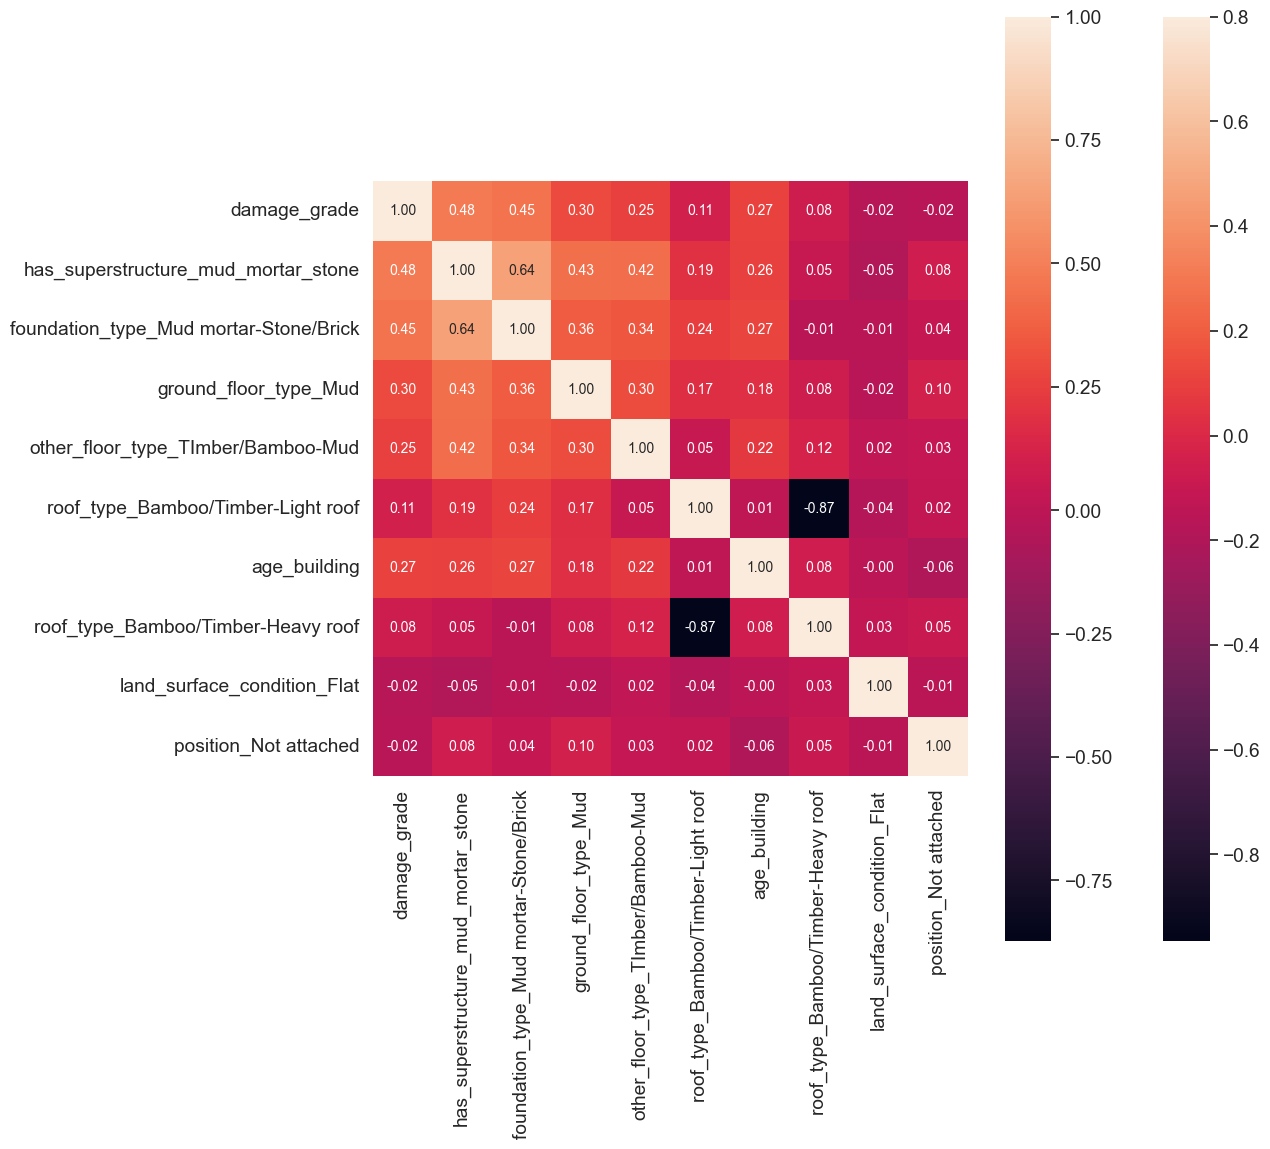

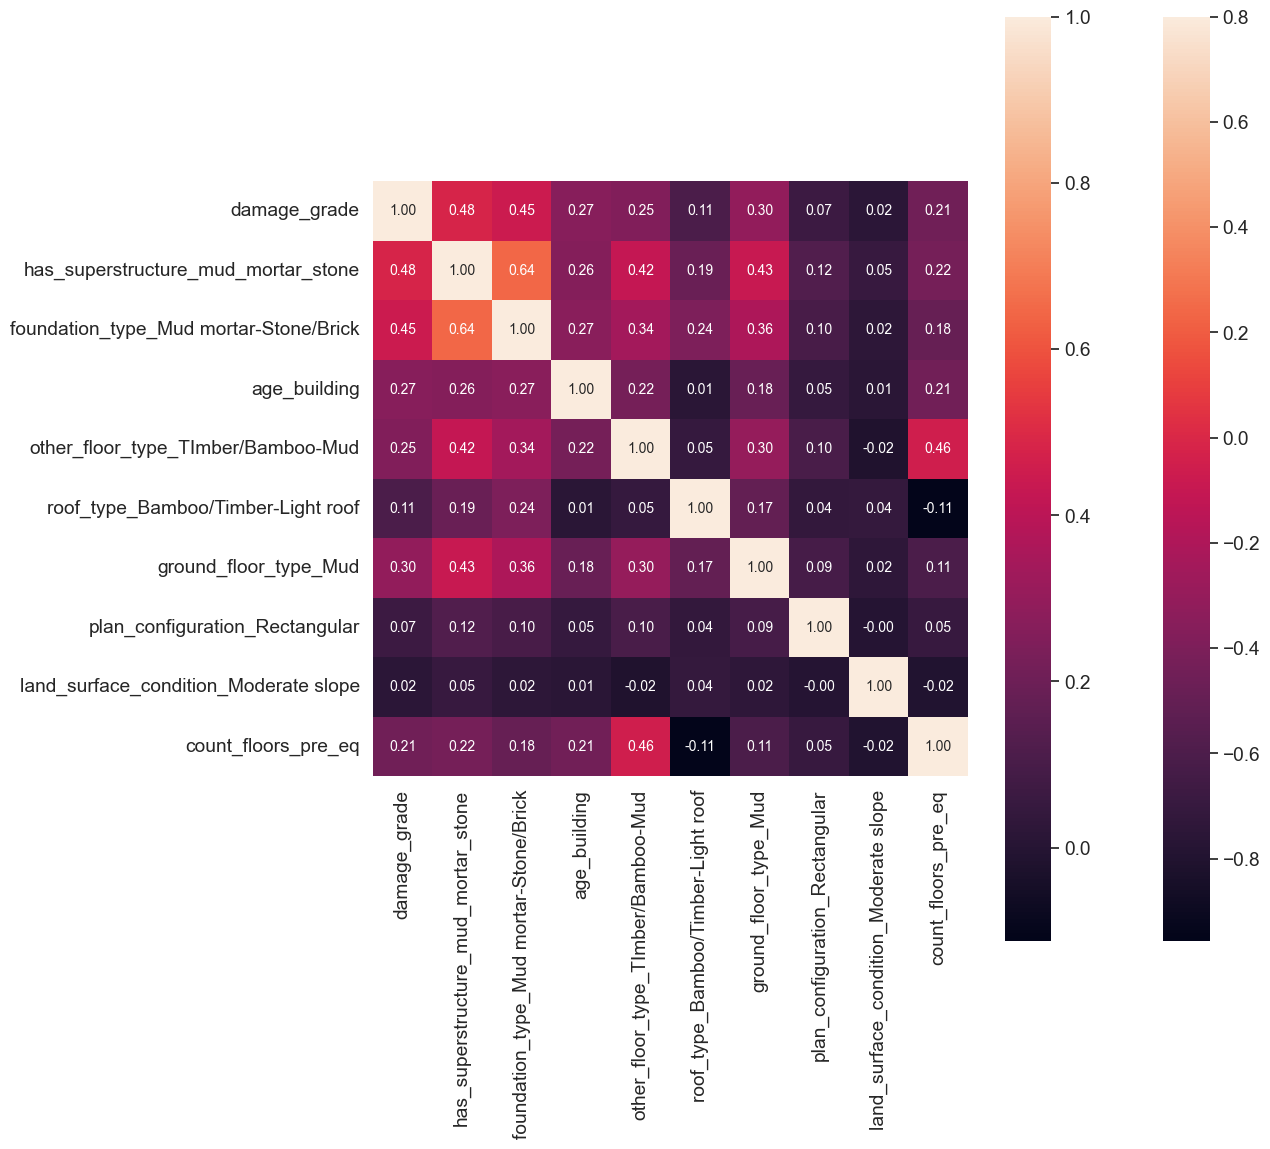

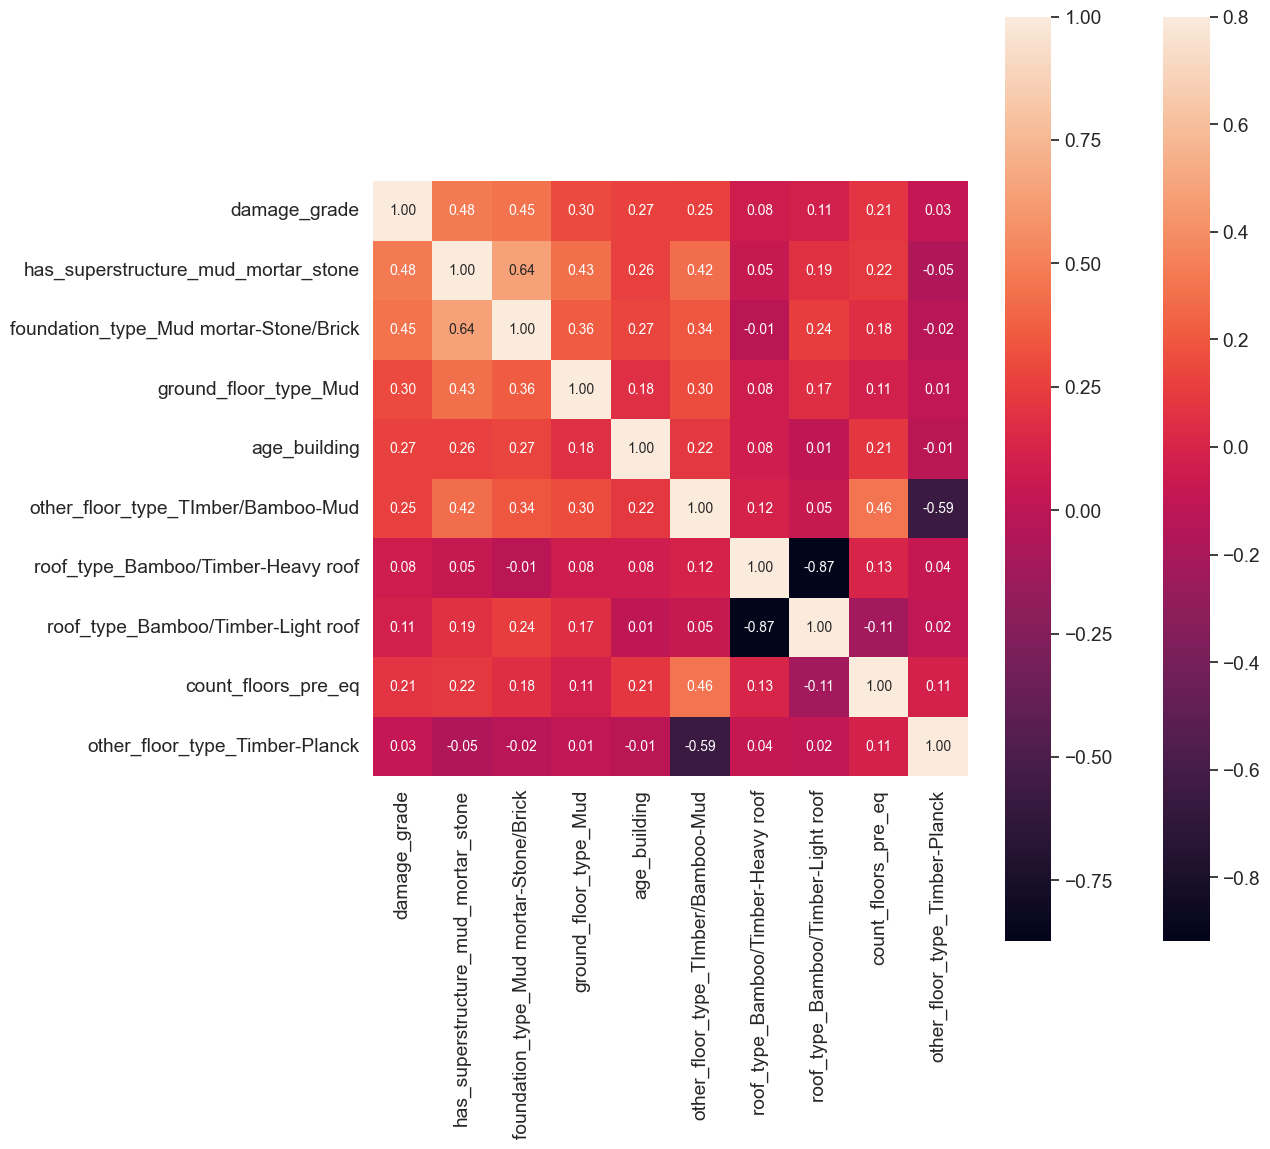

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
scaler = StandardScaler()
k=10

for name, group in grouped_dataframes:
    X = group.drop(['district_name'], axis=1)
    
    
    corrmat = X.corr()
    corrmat.sort_values('damage_grade',ascending=False).index
    f, ax = plt.subplots(figsize=(12, 12))
    sns.heatmap(corrmat, vmax=.8, square=True);
    
    cols = corrmat.nlargest(k, 'damage_grade')['damage_grade'].index
    cm = np.corrcoef(structure_data[cols].values.T)
    sns.set(font_scale=1.25)
    hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
    plt.show()
    